> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project:analyze the Data TMDb_Movies datse

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>#### **Question that can analyised from this data set**
>1. I will analyze the Data TMDb_Movies datse
>1. More movies watching
>2. More movies sales
>3. More movies for release year  
--------------------
> we will know
>1. Film revenues were known
>2. The profits of the films and calculated
>3. The budget of the films 
>4. The average number of films per year
> 5. Highest profits

In [21]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [24]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data = pd.read_csv('tmdb-movies.csv')
data.head()

mov_col = data.columns
mov_col


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Remove empty columns!)
>
> **Columns that we need to delete are**  -  id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.

In [25]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#creating a list of columb to be deleted
del_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#deleting the columns
data= data.drop(del_col,1)

#previewing the new dataset
data.head(4)


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015


In [26]:
data.describe()

,budget,revenue,runtime,release_year
count,1.086600e+04,1.086600e+04,10866.000000,10866.000000
mean,1.462570e+07,3.982332e+07,102.070863,2001.322658
std,3.091321e+07,1.170035e+08,31.381405,12.812941
min,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,1.500000e+07,2.400000e+07,111.000000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,2015.000000


> **2. Removing the duplicacy in the rows(if any).**
>
>Lets see how many entries we have in the database

In [110]:
rows, col = data.shape
#Wreduce the count of row by one 
print('There are {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are 10864 total entries of movies and 13 no.of columns in it.


In [111]:
data.drop_duplicates(keep ='first', inplace=True)
rows, col = data.shape

print('There are now {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are now 10864 total entries of movies and 13 no.of columns in it.


#  **Changing the release date column into  date format**


In [33]:
data.release_date = pd.to_datetime(data['release_date'])
data.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


 Replacing zero with NAN in runtime column.

In [35]:
data['runtime'] = data['runtime'].replace(0, np.NAN)
data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                  float64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [37]:
change_type=['budget', 'revenue']
#changing data type
data[change_type]=data[change_type].applymap(np.int64)
#printing the changed information
data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                  float64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


> **1. Calculating the profit of the each movie**

In [66]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
data.insert(2,'profit',data['revenue']-data['budget'])

#previewing the changes in the dataset
data.head(2)

,budget,revenue,profit,earned,profit_earned,title,cast,Auther,tagline,time,genres,release_date,release_year
0,150000000,1513528810,1363528810,1363528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,228436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


### (checking the value!)

In [58]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

data.rename(columns = {'budget': 'budget','release_date': 'release_date', 'revenue': 'revenue','tagline':'tagline','release_year':'release_year'}, inplace = True)

print(data.columns)

print('budget:',sorted(data.budget.unique()))
print('release_date:',data.release_date.unique())
print('revenue:',data.revenue.unique())
print('tagline:',data.tagline.unique())
print('release_year:',data.release_year.unique())



Index(['budget', 'revenue', 'title', 'cast', 'Auther', 'tagline', 'time',
       'genres', 'release_date', 'release_year'],
      dtype='object')
budget: [0, 1, 2, 3, 5, 6, 8, 10, 11, 12, 14, 15, 17, 18, 20, 21, 25, 27, 28, 30, 32, 68, 75, 80, 89, 90, 93, 95, 97, 108, 110, 113, 114, 115, 117, 126, 200, 300, 500, 650, 700, 750, 2500, 3500, 5000, 6000, 7000, 8000, 10000, 10400, 12000, 15000, 16398, 17000, 19000, 20000, 22500, 23000, 25000, 25710, 27000, 30000, 31192, 33000, 35000, 40000, 45000, 45202, 50000, 60000, 61733, 62000, 65000, 66500, 68000, 70000, 72000, 74050, 75000, 79000, 85000, 90000, 100000, 111000, 114000, 120000, 125000, 125687, 130000, 134005, 135000, 145786, 150000, 156660, 160000, 165000, 169000, 170000, 175000, 179000, 200000, 220000, 225000, 230000, 230400, 232000, 239000, 250000, 270000, 275000, 300000, 315000, 318000, 325927, 348164, 350000, 360000, 400000, 420000, 425000, 441892, 447524, 450000, 475000, 500000, 515788, 530000, 550000, 567000, 569217, 600000, 63001

### Movies which had most and least profit

In [67]:
import pprint

def calculate(column):
    #for highest earned profit
    high= data[column].idxmax()
    high_details=pd.DataFrame(data.loc[high])
    
    #for lowest earned profit
    low= data[column].idxmin()
    low_details=pd.DataFrame(data.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profit')
    

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
earned,2544505847,-413912431
profit_earned,2544505847,-413912431
title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
Auther,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
time,162,100


> Column with id 1386 shows the highest earned profit i.e 2544505847	.
>
> Whereas the column with id 2244 shows the lowest earned profit i.e -413912431

### Movies with largest and lowest budgets

In [68]:
calculate('budget')

,2244,30
budget,425000000,0
revenue,11087569,29355203
profit,-413912431,29355203
earned,-413912431,29355203
profit_earned,-413912431,29355203
title,The Warrior's Way,Mr. Holmes
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Ian McKellen|Milo Parker|Laura Linney|Hattie M...
Auther,Sngmoo Lee,Bill Condon
tagline,Assassin. Hero. Legend.,The man behind the myth
time,100,103


Column with id 2244 shows the largest budget i.e 425000000 dollar.

Whereas the column with id 2618 shows the smallest budget i.e 1 dollar

### Movies with most and least earned revenue


In [112]:
calculate('revenue')

,1386,48
budget,237000000,30000000
revenue,2781505847,0
profit,2544505847,-30000000
earned,2544505847,-30000000
profit_earned,2544505847,-30000000
title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
Auther,James Cameron,Simon West
tagline,Enter the World of Pandora.,Never bet against a man with a killer hand.
time,162,92


### Average release year of the movies

In [90]:
def avg_fun(column):
    return data[column].mean()
avg_fun('release_year')

2001.3218591808559

>So the mean of movies by the year 2001

## What factors are important for us to know in order to predict if a patient will be Male or Female


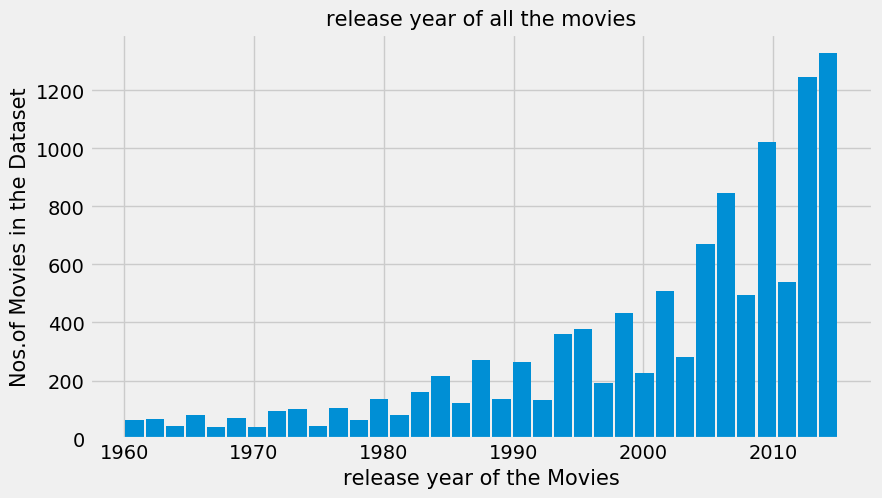

In [92]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('release year of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('release year of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(data['release_year'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

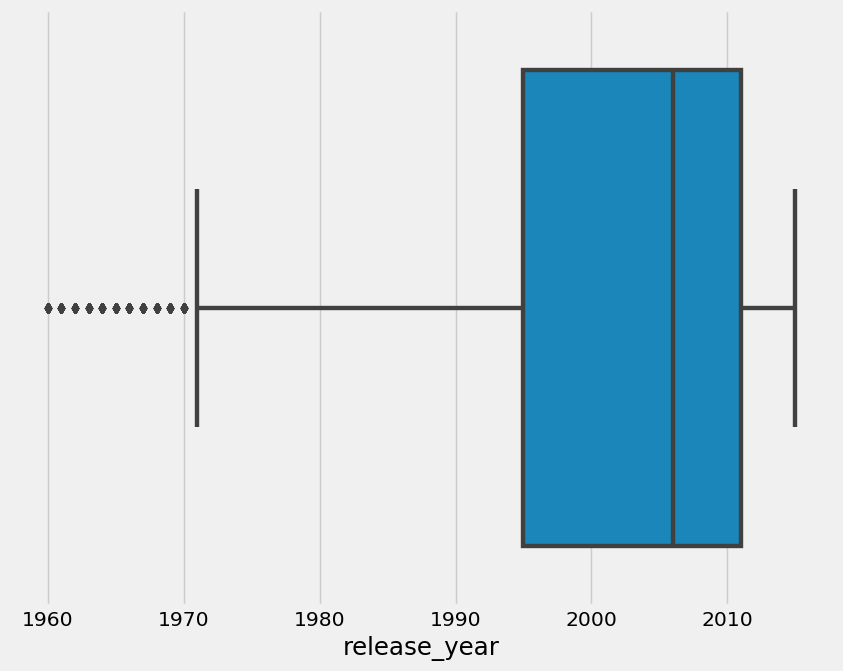

In [100]:
import seaborn as sns
#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to generate the boxplot
sns.boxplot(data['release_year'], linewidth = 3)
#diplaying the plot
plt.show()

In [101]:
data['release_year'].describe()

count    10865.000000
mean      2001.321859
std         12.813260
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

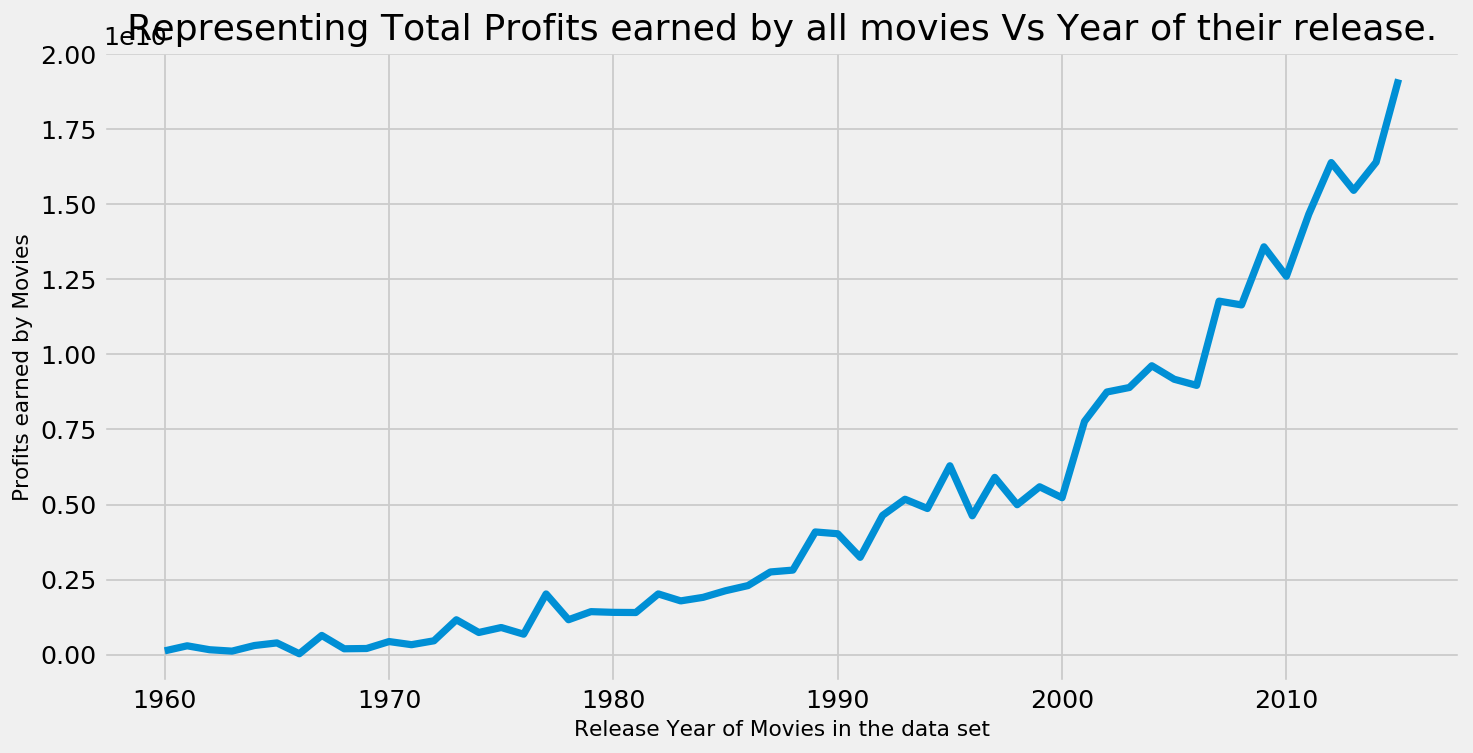

2015

In [105]:
profits_year = data.groupby('release_year')['profit_earned'].sum()
plt.figure(figsize=(12,6), dpi = 130)

plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
plt.ylabel('Profits earned by Movies', fontsize = 12)
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')
plt.plot(profits_year)
plt.show()

profits_year.idxmax()


## We conclude that the highest profit was in 2015

In [107]:
#selecting the movies having profit $50M or more
profit_data = data[data['profit_earned'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,budget,revenue,profit,earned,profit_earned,title,cast,Auther,tagline,time,genres,release_date,release_year
1,150000000,1513528810,1363528810,1363528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,228436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,185238201,185238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2015


In [108]:
len(profit_data)

1427

###  Average Budget of the movies


In [109]:
def profit_avg(column):
    return profit_data[column].mean()
profit_avg('budget')


56675090.037841626

### having profit of 50 million dollar and more have an average budget of 60 million dollar.

### The types of movies that have succeeded

In [ ]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = profit_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count
count = data('genres')
#printing top 5 values
count.head()

## we can see this using plot

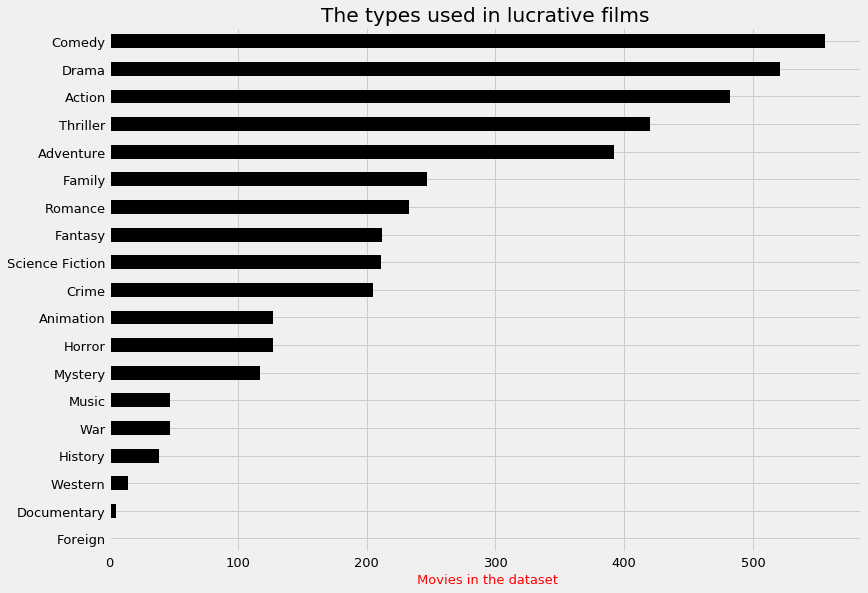

In [119]:
count.sort_values(ascending = True, inplace = True)

lt = count.plot.barh(color = '#000000', fontsize = 13)

lt.set(title = 'The types used in lucrative films')

lt.set_xlabel(' Movies in the dataset', color = 'red', fontsize = '13')

lt.figure.set_size_inches(12, 9)

plt.show()

<a id='conclusions'></a>
## Conclusions

> That's Good!! The plot generated above give a visual of complete distribution of release year of movies 
> 1. Film revenues were known
> 2. The profits of the films were known and calculated
> 3. The budget of the films was known
> 4. The average number of films per year was known
## Submitting your Project 

> By doing all this the movie might be one of the hits and hence can earn an average revenue of around 255 million dollar.

#### 1. This analysis was done considering the movies which had a significant amount of profit of around 50 million dollars. 
#### 2. This might not completely error free but by following this  suggestion one can increase the probability of a movie to become a hit. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])